In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "Facemaskdetection/train", target_size=(128, 128), batch_size=32, class_mode="binary"
)

Found 8118 images belonging to 2 classes.


In [4]:
with open("class_labels.pkl", "wb") as f:
    pickle.dump(train_data.class_indices, f)

val_data = val_test_datagen.flow_from_directory(
    "Facemaskdetection/val", target_size=(128, 128), batch_size=32, class_mode="binary"
)

test_data = val_test_datagen.flow_from_directory(
    "Facemaskdetection/test", target_size=(128, 128), batch_size=32, class_mode="binary"
)

Found 1822 images belonging to 2 classes.
Found 1809 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Soniya Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop]
)

C:\Users\Soniya Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
231/254 ━━━━━━━━━━━━━━━━━━━━ 18s 804ms/step - accuracy: 0.7310 - loss: 0.6934

C:\Users\Soniya Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7375 - loss: 0.6807

C:\Users\Soniya Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


254/254 ━━━━━━━━━━━━━━━━━━━━ 237s 916ms/step - accuracy: 0.7378 - loss: 0.6801 - val_accuracy: 0.8985 - val_loss: 0.3857
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 140s 551ms/step - accuracy: 0.8535 - loss: 0.4382 - val_accuracy: 0.9358 - val_loss: 0.2290
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 138s 544ms/step - accuracy: 0.8740 - loss: 0.3925 - val_accuracy: 0.9490 - val_loss: 0.2053
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 140s 551ms/step - accuracy: 0.8739 - loss: 0.3708 - val_accuracy: 0.9479 - val_loss: 0.1999
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 136s 534ms/step - accuracy: 0.8827 - loss: 0.3424 - val_accuracy: 0.9462 - val_loss: 0.2193
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 134s 526ms/step - accuracy: 0.8907 - loss: 0.3341 - val_accuracy: 0.9693 - val_loss: 0.1708
Epoch 7/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 135s 529ms/step - accuracy: 0.8974 - loss: 0.3194 - val_accuracy: 0.9643 - val_loss: 0.1665
Epoch 8/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 137s 540ms/step - accuracy: 0.9033 - loss: 0.29

In [8]:
test_loss, test_acc = model.evaluate(test_data)
print("✅ Test Accuracy:", round(test_acc*100, 2), "%")

57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 548ms/step - accuracy: 0.9740 - loss: 0.1434
✅ Test Accuracy: 97.57 %


In [9]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

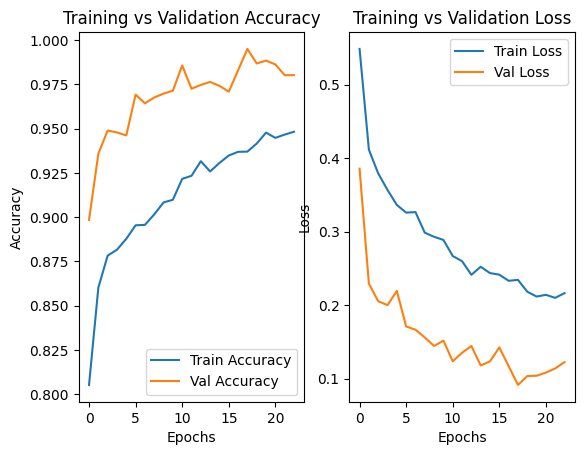

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [12]:
with open("class_labels.pkl", "rb") as f:
    class_labels = pickle.load(f)

In [13]:
class_labels = {v:k for k,v in class_labels.items()}

In [14]:
def predict_mask(img_path):
    """
    Predicts whether the person in the image is wearing a mask or not.
    
    Args:
        img_path (str): Path to the image file.
    
    Returns:
        str: Predicted class name ('with_mask' or 'without_mask').
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class_index = int(np.round(prediction[0][0]))  # Round sigmoid output to 0 or 1
    predicted_class_name = class_labels[predicted_class_index]

    print(f"✅ Predicted Class for '{img_path}': {predicted_class_name}")
    return predicted_class_name

In [18]:
predict_mask("Facemaskdetection/test/with_mask/augmented_4_8840099.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Predicted Class for 'Facemaskdetection/test/with_mask/augmented_4_8840099.png': With_mask


'With_mask'